## 1. Setup the environment

In [1]:
#the basics
import flopy
import numpy as np
import matplotlib as mp
import os

#additional analysis tools
import flopy.utils.binaryfile as bf
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import csv

#jupyter specific--included to show plots in notebook
%matplotlib inline 

flopy is installed in c:\users\jakey\appdata\local\programs\python\python38-32\lib\site-packages\flopy


## 2. Setup the input variables 

In [2]:
## Discritization
nrow = 50 #number of rows
ncol = 50 #number of columns
nlay = 3  #number of layers

dx= 1000 #width of grid cells in x diretion 
dy= 1000 #width of grid cells in y diretion 

Lx = ncol*dx  #width of domain in x
Ly = nrow*dy #width of domain in y

ztop = np.genfromtxt('top_elev.csv', delimiter=',', dtype=float)   # top elevation of top layer (import from csv file) (dim: nrow,ncol)
ztop[0,0] = 125.                                           # insert missing initial value (not sure why didn't import)
#print(type(ztop))
#print(ztop.shape)
#print(ztop[0,:])
zbot = 0.     #bottom elevation

dz = (ztop - zbot) / nlay #cell height in z direction

## Timing
nper = 1 #number of stress periods 
steady = [True] #list noting the stress period type

## Subsurface properties
K_horiz = 10.    #horizontal hydraulic conductivity 
K_vert = 10    #assign vertical hydraulic conductivity (along z axis)
n = 0.1        #assign porosity
Ss = 0.0001      #assign storage coefficient
Sy = 0.1        #assign specific yield
uncnf = 1       #0=confined, >0 = unconfined



#well
pumping = 1500 #m3/day  *This rate was figured out from the Water balance of the ET scenario
well_xy= [38000, 21000] #xy location of well 
well_row = np.floor((nrow-1)-(well_xy[1]/dy)) #convert the y location to a row
well_col=np.floor(well_xy[0]/dx-1) #convert the x location to a column
well_loc = (0,well_row,well_col) #Well loc shoudl be layer, row, column
#print(well_loc)
#print(well_col)

#well - monitoring 1
#pumping2 = 0 #m3/day  *This rate was figured out from the Water balance of the ET scenario
#well1_xy= [25000, 25000] #xy location of well 
#well1_row = np.floor((nrow-1)-(well1_xy[1]/dy)) #convert the y location to a row
#well1_col=np.floor(well1_xy[0]/dx-1) #convert the x location to a column
#well1_loc = (2,well1_row,well1_col) #Well loc shoudl be layer, row, column
#print(well_loc)
#print(well_col)

#well - monitoring 2
#pumping2 = 0 #m3/day  *This rate was figured out from the Water balance of the ET scenario
#well2_xy= [12500, 12500] #xy location of well 
#well2_row = np.floor((nrow-1)-(well2_xy[1]/dy)) #convert the y location to a row
#well2_col=np.floor(well2_xy[0]/dx-1) #convert the x location to a column
#well2_loc = (2,well2_row,well2_col) #Well loc shoudl be layer, row, column
#print(well_loc)
#print(well_col)

## Boundary conditions
h_right = 70

ET= 1e-5
ET_locxy=[[25000,0],[50000,50000]]
extinction_depth=10


z_recharge=4e-5
z_llxy=[0,0]  #xy coordinates of lower left corner
z_urxy=[15000,50000] #xy coordiantes of upper right corner
##convert to rows and columns
z_rowll = int(np.floor((nrow-1)-(z_llxy[1]/dy)+1)) #convert the y location to a row
z_colll=int(np.floor(z_llxy[0]/dx))          #convert the x location to a column
z_rowur = int(np.floor((nrow-1)-(z_urxy[1]/dy)+1)) #convert the y location to a row
z_colur=int(np.floor(z_urxy[0]/dx))          #convert the x location to a column
print(z_colll, z_rowll, z_colur, z_rowur)

#NOTE - Recharge applies to the top so this is always 1 layer input even when the model has more layers
R_zones = np.zeros((1,nrow,ncol))                             # define an array of zeros the size of the model grid
R_zones[0,z_rowur:z_rowll, z_colll:z_colur] = z_recharge

z2_ET=5e-5
z2_llxy= [0,23000]  #xy coordinates of lower left corner
z2_urxy= [50000,29000] #xy coordiantes of upper right corner
##convert to rows and columns
z2_rowll = int(np.floor((nrow-1)-(z2_llxy[1]/dy)+2)) #convert the y location to a row
z2_colll=int(np.floor(z2_llxy[0]/dx))          #convert the x location to a column
z2_rowur = int(np.floor((nrow-1)-(z2_urxy[1]/dy)+1)) #convert the y location to a row
z2_colur=int(np.floor(z2_urxy[0]/dx))          #convert the x location to a column
print(z2_colll, z2_rowll, z2_colur, z2_rowur)

#NOTE - Recharge applies to the top so this is always 1 layer input even when the model has more layers
ET_zones = np.zeros((1,nrow,ncol))                             # define an array of zeros the size of the model grid
ET_zones[0,z2_rowur:z2_rowll, z2_colll:z2_colur] = z2_ET

z3_ET=1e-5
z3_llxy= [25000,0]  #xy coordinates of lower left corner
z3_urxy= [50000,50000] #xy coordiantes of upper right corner
#convert to rows and columns
z3_rowll = int(np.floor((nrow-1)-(z3_llxy[1]/dy)+1)) #convert the y location to a row
z3_colll=int(np.floor(z3_llxy[0]/dx))          #convert the x location to a column
z3_rowur = int(np.floor((nrow-1)-(z3_urxy[1]/dy)+1)) #convert the y location to a row
z3_colur=int(np.floor(z3_urxy[0]/dx))          #convert the x location to a column
print(z3_colll, z3_rowll, z3_colur, z3_rowur)

#NOTE - Recharge applies to the top so this is always 1 layer input even when the model has more layers
ET3_zones = np.zeros((1,nrow,ncol))                             # define an array of zeros the size of the model grid
ET3_zones[0,z3_rowur:z3_rowll, z3_colll:z3_colur] = z3_ET

0 50 15 0
0 28 50 21
25 50 50 0


## 3. Setup and run MODFLOW for the one layer scenario 

## 4. Setup and run MODFLOW for the three layer scenario 

In [3]:
#Initialize the model
modelname3 = "BaseModel"
moddir="C:\mf2005"
m3 = flopy.modflow.Modflow(modelname3, exe_name = moddir)

## Make some changes to the parameters
nlay2=3  #two layers instead of 1
botm = np.zeros((nlay2,nrow,ncol)) # initialize array of zeros for bottom elevation for each model cell (dim: nlay,nrow,ncol)
botm[1,:,:] = 40.                 # bottom elevation of middle layer (1) is 25 m
botm[0,:,:] = 45.                 # bottom elevation of top layer (0) is 35 m 

## Make a arrays for the K values
Kz = np.zeros((nlay2,nrow,ncol))     # define an array of zeros the size of the model grid (nlay, nrow, ncol)
Kz[:,:,:] = K_vert                   # assign the original value to the entire array
Kz[1,:,21:50] = 0.0001           #Replace the K in the middle layer with the lower value

Kh = np.zeros((nlay2,nrow,ncol))     # define an array of zeros the size of the model grid (nlay, nrow, ncol)
Kh[:,:,:] = K_horiz                  # assign the original value to the entire array
Kh[1,:,:] = K_horiz           #Replace the K in the middle layer with the lower value

#Discretization - dis
dis = flopy.modflow.ModflowDis(model=m3, nlay=nlay2, nrow=nrow, ncol=ncol, 
                               delr=dx, delc=dy, top=ztop, botm=botm, 
                               itmuni = 4, lenuni = 2, 
                               nper=nper, steady=steady)

# Boundary and initial conditions - bas
#Define cell activity (IBOUND)
ibound = np.ones((nlay2, nrow, ncol), dtype=np.int32) #integer array of dim (z,y,x), makes all cells active                                                     
#ibound[:,:,:] = -1          #replace rightmost column (all zs, all ys, first x) with -1 to indicate constant head
ibound[:,:,49] = -1 
ibound[:,:,0] = 0 
ibound[:,45:50,1] = 0 
ibound[:,0:5,1] = 0 
ibound[:,46:50,2] = 0 
ibound[:,0:4,2] = 0 
ibound[:,47:50,3] = 0 
ibound[:,0:3,3] = 0 
ibound[:,48:50,3] = 0 
ibound[:,0:2,3] = 0 
ibound[:,48:50,4] = 0 
ibound[:,0:2,4] = 0 
ibound[:,0,:49] = 0 
ibound[:,49,:49] = 0 

ibound[1,43:50,1] = 0
ibound[1,0:7,1] = 0
ibound[1,44:50,2] = 0
ibound[1,0:6,2] = 0
ibound[1,45:50,3] = 0
ibound[1,0:5,3] = 0
ibound[1,46:50,4] = 0
ibound[1,:4,4] = 0
ibound[1,47:,5] = 0
ibound[1,:3,5] = 0
ibound[1,48:,6] = 0 
ibound[1,:2,6] = 0

ibound[2,41:50,1] = 0
ibound[2,0:9,1] = 0
ibound[2,42:50,2] = 0
ibound[2,0:8,2] = 0
ibound[2,43:50,3] = 0
ibound[2,0:7,3] = 0
ibound[2,44:50,4] = 0
ibound[2,:6,4] = 0
ibound[2,45:,5] = 0
ibound[2,:5,5] = 0
ibound[2,46:,6] = 0 
ibound[2,:4,6] = 0
ibound[2,47:,7] = 0 
ibound[2,:3,7] = 0
ibound[2,48:,8] = 0 
ibound[2,:2,8] = 0

#setup initial heads as 1 everywhere except on the boundaries
H_init = np.ones((nlay2, nrow, ncol), dtype=np.float32)  
H_init[:, :, 49] = h_right    #
bas = flopy.modflow.ModflowBas(m3, ibound=ibound, strt=H_init)

print(H_init)

#Layer properties - lpf
lpf = flopy.modflow.ModflowLpf(m3, laytyp=uncnf, hk=Kh, 
                               vka=Kz, ss=Ss,
                               sy=Sy,storagecoefficient=True, ipakcb=53) 


rch= flopy.modflow.mfrch.ModflowRch(model=m3, rech=R_zones, ipakcb=53)


evt = flopy.modflow.mfevt.ModflowEvt(m3, surf=ztop, evtr=ET_zones, exdp=extinction_depth, ipakcb=53) 
evt = flopy.modflow.mfevt.ModflowEvt(m3, surf=ztop, evtr=ET3_zones, exdp=extinction_depth, ipakcb=53) 



#Well
well_loc = (2,well_row,well_col) #Well loc shoudl be layer, row, column
well_1 = [i for i in well_loc] + [-pumping]
print(well_1)
print("Well 1 [layer, row, column, flux]: \n", well_1)
wel_spd = {0: [well_1]} #putting the well in the bottom layer
wel = flopy.modflow.ModflowWel(model=m3, stress_period_data=wel_spd)

#Monitoring Well 1
#well1_loc = (2,well1_row,well1_col) #Well loc shoudl be layer, row, column
#well1_1 = [i for i in well1_loc] + [-pumping2]
#print(well1_1)
#print("Well 1 [layer, row, column, flux]: \n", well_1)
#wel_spd = {2: [well1_1]} #putting the well in the bottom layer
#Monitoring Well2
#well2_loc = (2,well2_row,well2_col) #Well loc shoudl be layer, row, column
#well2_1 = [i for i in well2_loc] + [-pumping2]
#print(well2_1)
#print("Well 1 [layer, row, column, flux]: \n", well_1)
#wel_spd = {2: [well2_1]} #putting the well in the bottom layer
#wel = flopy.modflow.ModflowWel(model=m3, stress_period_data=wel_spd)

#Stream using RIV
riv_sp1 = [] #create list to store all river cells for stress period 1
k_rivbott = 1000 #river bottom hydraulic conductivity in m/d
sed_thick = 1 #thickness of riverbed sediment in m
cond = k_rivbott*(1)*(1)/(sed_thick) #river bed conductance in m^2/d
r_stage = 0.5 #stage in river (stress period 1)
r_bott = -1 #river bottom
    #assign river data to cells in central column
for i in range(ncol):
    riv_sp1.append([0, nrow/2, i, r_stage, cond, r_bott])
riv_spd = {0: riv_sp1}
    #attach river package
riv = flopy.modflow.ModflowRiv(model=m3,stress_period_data = riv_spd, ipakcb=53)

#Output control - OC 
spd = {(0,0):['print head', 'print budget', 'save head', 'save budget']} #create a dictionary for stress period data, where key (0,0) is associated with value ['print...'] 
oc = flopy.modflow.ModflowOc(model=m3, stress_period_data=spd, compact=True)

#Numerical solver - pcg
pcg = flopy.modflow.ModflowPcg(model=m3)

    
#write the inputs
m3.write_input()    

#Run the model 
success, mfoutput = m3.run_model(pause=False, report=True)
if not success:
    raise Exception('MODFLOW did not terminate normally.')

[[[ 1.  1.  1. ...  1.  1. 70.]
  [ 1.  1.  1. ...  1.  1. 70.]
  [ 1.  1.  1. ...  1.  1. 70.]
  ...
  [ 1.  1.  1. ...  1.  1. 70.]
  [ 1.  1.  1. ...  1.  1. 70.]
  [ 1.  1.  1. ...  1.  1. 70.]]

 [[ 1.  1.  1. ...  1.  1. 70.]
  [ 1.  1.  1. ...  1.  1. 70.]
  [ 1.  1.  1. ...  1.  1. 70.]
  ...
  [ 1.  1.  1. ...  1.  1. 70.]
  [ 1.  1.  1. ...  1.  1. 70.]
  [ 1.  1.  1. ...  1.  1. 70.]]

 [[ 1.  1.  1. ...  1.  1. 70.]
  [ 1.  1.  1. ...  1.  1. 70.]
  [ 1.  1.  1. ...  1.  1. 70.]
  ...
  [ 1.  1.  1. ...  1.  1. 70.]
  [ 1.  1.  1. ...  1.  1. 70.]
  [ 1.  1.  1. ...  1.  1. 70.]]]
****Warning -- two packages of the same type:  <class 'flopy.modflow.mfevt.ModflowEvt'> <class 'flopy.modflow.mfevt.ModflowEvt'>
replacing existing Package...
[2, 28.0, 37.0, -1500]
Well 1 [layer, row, column, flux]: 
 [2, 28.0, 37.0, -1500]
[2, 24.0, 24.0, 0]
Well 1 [layer, row, column, flux]: 
 [2, 28.0, 37.0, -1500]
[2, 36.0, 11.0, 0]
Well 1 [layer, row, column, flux]: 
 [2, 28.0, 37.0, -1500]


# 5. Plot the domains

### Plan view of the domain

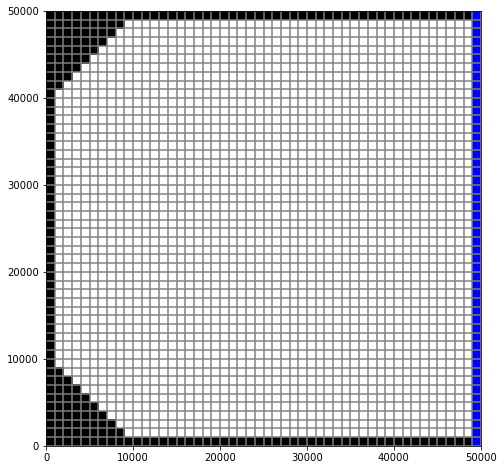

In [18]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
mapview = flopy.plot.PlotMapView(model=m3, layer=2)
ibound = mapview.plot_ibound()
wel = mapview.plot_bc("WEL")
linecollection = mapview.plot_grid()

### Cross section of the layered model
For more examples of cross section plotting check out this notebook: https://github.com/modflowpy/flopy/blob/develop/examples/Notebooks/flopy3.3_PlotCrossSection.ipynb 

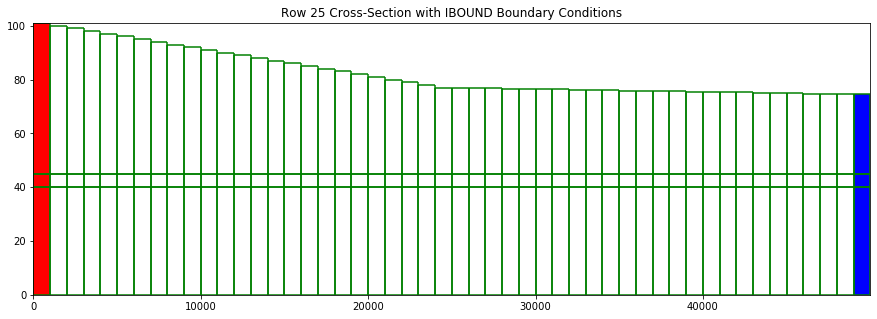

In [5]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

xsect = flopy.plot.PlotCrossSection(model=m3, line={'row': 24}) #note use the key 'column' if you want to plot a column instaed
patches = xsect.plot_ibound(color_noflow='red', color_ch='blue')
patches = xsect.plot_bc('WEL', color='red')
linecollection = xsect.plot_grid(color='green')
t = ax.set_title('Row 25 Cross-Section with IBOUND Boundary Conditions')

# 5. Add particles to both scenarios


#### Run the 1 layer scenario

In [6]:
moddirmp="C:\mpath7"

locsb = [[0, z2_rowur, z2_colll, 0, z2_rowll, z2_colur]]
sd= flopy.modpath.CellDataType(drape=0, columncelldivisions=3, rowcelldivisions=3, layercelldivisions=1)
p= flopy.modpath.LRCParticleData(subdivisiondata=[sd], lrcregions=[locsb])
pg1 = flopy.modpath.ParticleGroupLRCTemplate(particlegroupname='PG1',particledata=p,filename='ex01a.pg1.sloc')
particlegroups = [pg1]

defaultiface = {'RECHARGE': 6, 'ET': 6}

#### Run the 3 layer scenario

In [7]:
locsb = [[0, z2_rowur, z2_colll, 0, z2_rowll, z2_colur]]
sd= flopy.modpath.CellDataType(drape=0, columncelldivisions=1, rowcelldivisions=1, layercelldivisions=1)
p= flopy.modpath.LRCParticleData(subdivisiondata=[sd], lrcregions=[locsb])
pg1 = flopy.modpath.ParticleGroupLRCTemplate(particlegroupname='PG1',particledata=p,filename='ex01a.pg1.sloc')
particlegroups = [pg1]

defaultiface = {'RECHARGE': 6, 'ET': 6}

mpname3=os.path.join(modelname3 + '_mp')
print(mpname3)
mp3 = flopy.modpath.Modpath7(modelname=modelname3 + '_mp', flowmodel=m3, exe_name=moddirmp)
mpbas = flopy.modpath.Modpath7Bas(mp3, porosity=n, defaultiface=defaultiface)
mpsim = flopy.modpath.Modpath7Sim(mp3, simulationtype='combined',
                                  trackingdirection='forward',
                                  weaksinkoption='stop_at',
                                  weaksourceoption='stop_at',
                                  budgetoutputoption='summary',
                                  stoptimeoption='extend', 
                                  particlegroups= particlegroups)


mp3.add_package(rch)
mp3.add_package(evt)
mp3.write_input()
mp3.run_model()
mp3.get_package_list()

BaseModel_mp
FloPy is using the following  executable to run the model: C:\mpath7.exe

MODPATH Version 7.2.001   
Program compiled Dec 22 2017 11:11:36 with IFORT compiler (ver. 16.0.0)         
 
 
Run particle tracking simulation ...
Processing Time Step     1 Period     1.  Time =  1.00000E+00  Steady-state flow                                                    

Particle Summary:
         0 particles are pending release.
         0 particles remain active.
         0 particles terminated at boundary faces.
         0 particles terminated at weak sink cells.
         0 particles terminated at weak source cells.
       392 particles terminated at strong source/sink cells.
         0 particles terminated in cells with a specified zone number.
         0 particles were stranded in inactive or dry cells.
         0 particles were unreleased.
         0 particles have an unknown status.
 
Normal termination.                                                        


['MPBAS', 'MPSIM', 'RCH', 'EVT']

# 6. Read in the outputs

###  Modflow outputs - Heads and budget files

In [8]:

#Head - 3 layer model 
headobj3 = bf.HeadFile(modelname3+'.hds')    #reads the binary head file
times = headobj3.get_times()                #returns a list of timesteps
head3 = headobj3.get_data(totim=times[-1])        #returns a numpy array of heads for specified time (last timestep)



#Water balance - 3 layer
budgobj3 = bf.CellBudgetFile(modelname3+'.cbc')   #reads the cell budget file    
print(budgobj3.get_unique_record_names())
kstpkper_list3 = budgobj3.get_kstpkper()          #returns a list of stress periods & timesteps
frf3 = budgobj3.get_data(text='flow right face', totim=1.0) #returns an array of flow rates for right face of cells
fff3 = budgobj3.get_data(text='flow front face', totim=1.0) #returns an array of flow rates for front face of cells 
et3 = budgobj3.get_data(text='ET', totim=1.0)
recharge3 = budgobj3.get_data(text='RECHARGE', totim=1.0) 
print(len(frf3))

[b'   CONSTANT HEAD', b'FLOW RIGHT FACE ', b'FLOW FRONT FACE ', b'FLOW LOWER FACE ', b'   RIVER LEAKAGE', b'              ET', b'        RECHARGE']
1


### Particle outputs 

In [9]:

fpth3 = os.path.join(mpname3 + '.mppth')
p3 = flopy.utils.PathlineFile(fpth3)

#Particle endpoints
fpth3 = os.path.join(mpname3 + '.mpend')
e3 = flopy.utils.EndpointFile(fpth3, verbose=False)

#make a subset which is all the particles
pall3 = p3.get_alldata()  
#eall3 = e3.get_alldata()
        
#make a subset which is particles ending in the well
nodewell3 = m3.dis.get_node([(2,well_row, well_col)])
print(nodewell3)
pwell3 = p3.get_destination_pathline_data(dest_cells=nodewell3)
ewell3 = e3.get_destination_endpoint_data(dest_cells=nodewell3)



[6437]


# 6. Plotting
#### Cross section plots

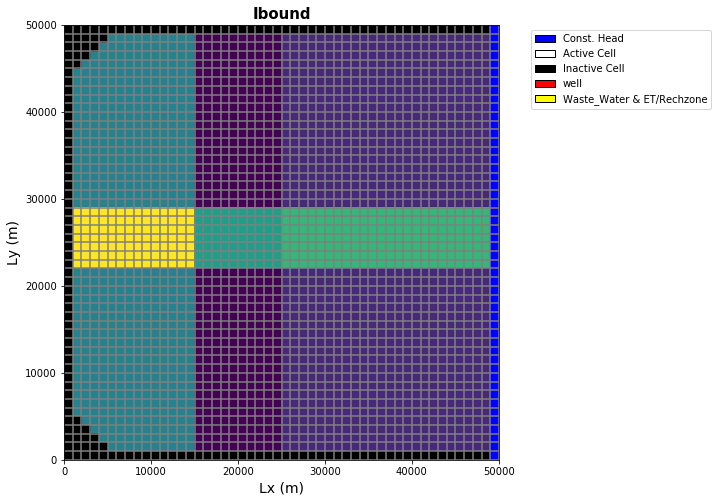

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect='equal')

modelmap = flopy.plot.PlotMapView(model=m3)

quadmesh = modelmap.plot_bc('WEL')

quadmesh = modelmap.plot_array(ET3_zones+ET_zones+R_zones)

quadmesh = modelmap.plot_ibound()

grid = modelmap.plot_grid()


#add labels and legend
plt.xlabel('Lx (m)',fontsize = 14)
plt.ylabel('Ly (m)',fontsize = 14)
plt.title('Ibound', fontsize = 15, fontweight = 'bold')
plt.legend(handles=[mp.patches.Patch(color='blue',label='Const. Head',ec='black'),
                   mp.patches.Patch(color='white',label='Active Cell',ec='black'),
                   mp.patches.Patch(color='black',label='Inactive Cell',ec='black'),
                    mp.patches.Patch(color='red',label='well',ec='black'), 
                   mp.patches.Patch(color='yellow',label='Waste_Water & ET/Rechzone',ec='black')],
                   bbox_to_anchor=(1.5,1.0))

plt.show(modelmap)

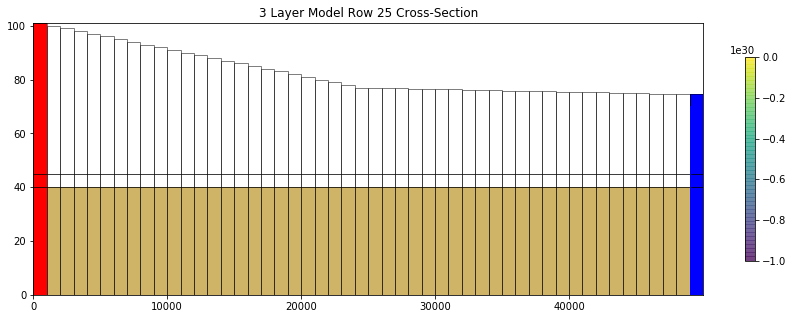

In [11]:
#### 3 layered model 
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

xsect = flopy.plot.PlotCrossSection(model=m3, line={'row': 24}) #note use the key 'column' if you want to plot a column instaed
pc = xsect.plot_array(head3, masked_values=[999.], head=head3, alpha=0.5)
patches = xsect.plot_ibound(head=head3)
patches = xsect.plot_ibound(color_noflow='red', color_ch='blue')
patches = xsect.plot_bc('WEL', color='red')
linecollection = xsect.plot_grid(color='black', lw=0.5)
t = ax.set_title('3 Layer Model Row 25 Cross-Section')
cb = plt.colorbar(pc, shrink=0.75)
#Overlay the head in a layer of the model- in this case I'm doing the top layer i.e. head3[0,:,:]
wt = xsect.plot_surface(head3[0,:,:], masked_values=[999.], color='blue', lw=1)


### Plot particle pathlines

###  1 Layer Head Contours

### 3 Layer head contours

In [12]:
print("ET Scenario")
print("Total Reacharge", np.sum(recharge3[0][1]))
print("Total ET", np.sum(et3[0][1])) 


ET Scenario
Total Reacharge 24000.0
Total ET -6035.771


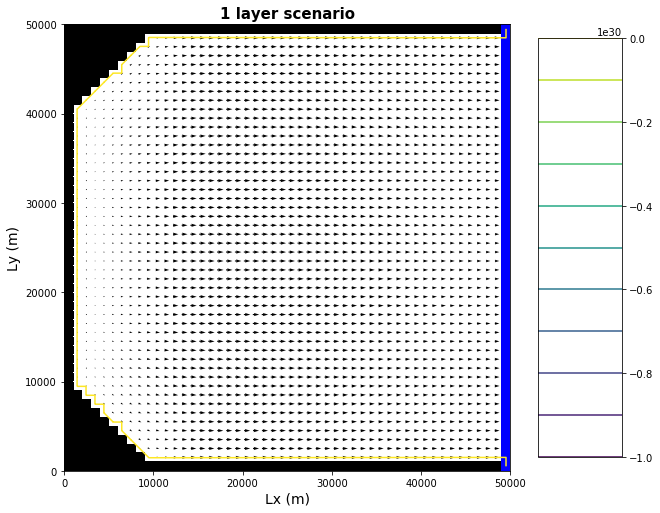

In [13]:
#f, axes = plt.subplots(ncols=1, nrows=2, figsize=(5, 10))
fig3=plt.figure(figsize=(10,10))

modelmap = flopy.plot.PlotMapView(model=m3, layer=2) #use modelmap to attach plot to model
#grid = modelmap.plot_grid() #plot model grid
qm = modelmap.plot_ibound()  
contour_levels = np.linspace(head3[0].min(),head3[0].max(),11) #set contour levels for contouring head
head_contours = modelmap.contour_array(head3, levels=contour_levels) #create head contours
flows = modelmap.plot_discharge(frf3[0], fff3[0], head=head3) #create discharge arrows

#display parameters
plt.xlabel('Lx (m)',fontsize = 14)
plt.ylabel('Ly (m)',fontsize = 14)
plt.title('1 layer scenario', fontsize = 15, fontweight = 'bold')
plt.colorbar(head_contours,aspect=5)
#plt.show(modelmap)
#plt.savefig('WellScenario_vectors.png')   

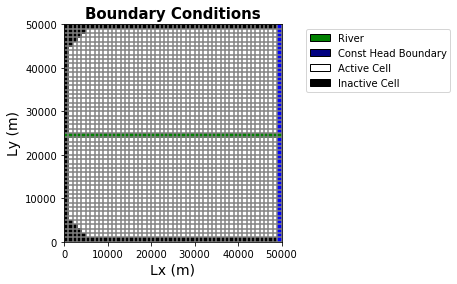

In [14]:
#CHECK BOUNDARY CONDITIONS
#use flopy to plot grid, ibound, rivers, and general head boundaries
modelmap = flopy.plot.PlotMapView(model=m3, layer=0)
grid = modelmap.plot_grid()
ib = modelmap.plot_ibound()
riv_plot = modelmap.plot_bc(ftype='RIV')

#add labels and legend
plt.xlabel('Lx (m)',fontsize = 14)
plt.ylabel('Ly (m)',fontsize = 14)
plt.title('Boundary Conditions', fontsize = 15, fontweight = 'bold')
plt.legend(handles=[mp.patches.Patch(color='green',label='River',ec='black'),
                   mp.patches.Patch(color='navy',label='Const Head Boundary',ec='black'),
                   mp.patches.Patch(color='white',label='Active Cell',ec='black'),
                   mp.patches.Patch(color='black',label='Inactive Cell',ec='black')],
                   bbox_to_anchor=(1.8,1.0))
plt.show(modelmap)